In [2]:
import sys
import os
sys.path.append('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/')

from plot_utils import plot_cluster_size_distribution, analyze_bond_network, plot_rdfs, plot_3d_cluster_with_graph
from bondmodifier_utils import canonical_cluster_workflow, import_file, summarize_bonds
import numpy as np
import networkx as nx


/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/cluster_analysis/bondmodifier_utils.py:36: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.signal import find_peaks


In [3]:
import glob
file_list = glob.glob('/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x*/T*/dump.lammpstrj')

In [4]:
file_list 

['/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1200K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1100K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T800K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1300K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1000K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T1250K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.40/T900K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1200K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1100K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T800K/dump.lammpstrj',
 '/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3

In [5]:
# User inputs
infile = "/pscratch/sd/p/pvashi/irp/irp_mace_l_2/irp/density/NaCl-PuCl3/x0.27/T1100K/dump.lammpstrj"
rdf_samples = 100  # adjust for speed/accuracy


In [6]:
pipe = import_file(infile, multiple_frames=True)
print(f"Loaded trajectory with {pipe.source.num_frames} frames")

# Still construct all bonds (Voronoi and NaCl) but only cluster Pu atoms
result = canonical_cluster_workflow(
    pipeline=pipe,
    # disable_pair=("Na", "Cl"),  # Keep all bonds for construction
    metals=["Pu"],  # Only Pu for cluster analysis, ignoring Na nodes
    anion="Cl",
    rdf_samples=rdf_samples,
)

r = result["rdf"]
cutoffs = result["pair_cutoffs"]
print("Pairwise cutoffs:", cutoffs)



Loaded trajectory with 14615 frames
Pairwise cutoffs: {('Pu', 'Cl'): 3.2600000000000002, ('Cl', 'Pu'): 3.2600000000000002, ('Na', 'Cl'): 3.42, ('Cl', 'Na'): 3.42}


In [7]:
result["rdf"].keys()

dict_keys(['Na-Na', 'Cl-Na', 'Na-Pu', 'Cl-Cl', 'Cl-Pu', 'Pu-Pu', 'r'])

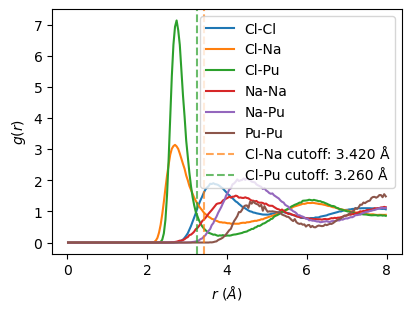

In [8]:
plot_rdfs(result["rdf"], cutoffs=cutoffs)

In [9]:
from bondmodifier_utils import build_shared_anion_graph

In [10]:
# sizes, cluster_ids, G = build_shared_anion_graph(result["data"], result["names"], anion="Cl", metals=["Pu"])

Clusters: 106 | Largest: 63 | Avg: 3.62


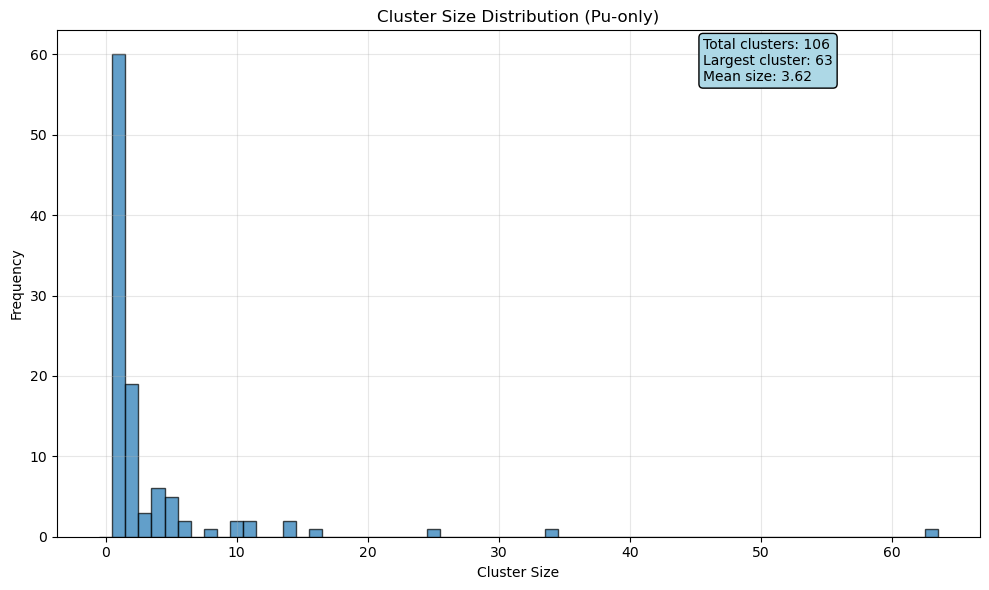

Bond counts: {'Cl-Pu': 2266, 'Cl-Na': 4451}


In [11]:
# Unpack results and analyze
names = result["names"]
sizes = result["sizes"]
cluster_ids = result["cluster_ids"]
data0 = result["data"]
G = result["graph"]

print(f"Clusters: {len(sizes)} | Largest: {np.max(sizes) if len(sizes)>0 else 0} | Avg: {np.mean(sizes) if len(sizes)>0 else 0:.2f}")

# Plot size distribution
plot_cluster_size_distribution(sizes, title="Cluster Size Distribution (Pu-only)")

# Bond summary
counts = summarize_bonds(data0, names)
print("Bond counts:", counts)



In [12]:
result["sizes"]


array([ 5,  5, 63,  1,  1,  2, 11,  2, 14, 10,  3,  1,  8,  2,  1, 11,  4,
        1,  2,  1,  2,  1,  1,  3,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  2, 34,  1,  2,  1, 16,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  6,  1,  2,  2, 14, 25,  2,  5,  1,  6,  5,  1,
        1,  4,  1,  2,  1,  4,  2,  1,  1,  1,  4,  2,  1,  1,  1,  1,  4,
        1, 10,  4,  1,  2,  1,  1,  1,  3,  5,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1])

In [13]:
cluster_ids

array([ 0, -1, -1, ..., -1, -1, -1], shape=(3584,))

In [14]:
len([1 for i in cluster_ids if i==-1])


3200

In [15]:
from plot_utils import plot_3d_graph_components_pu_only

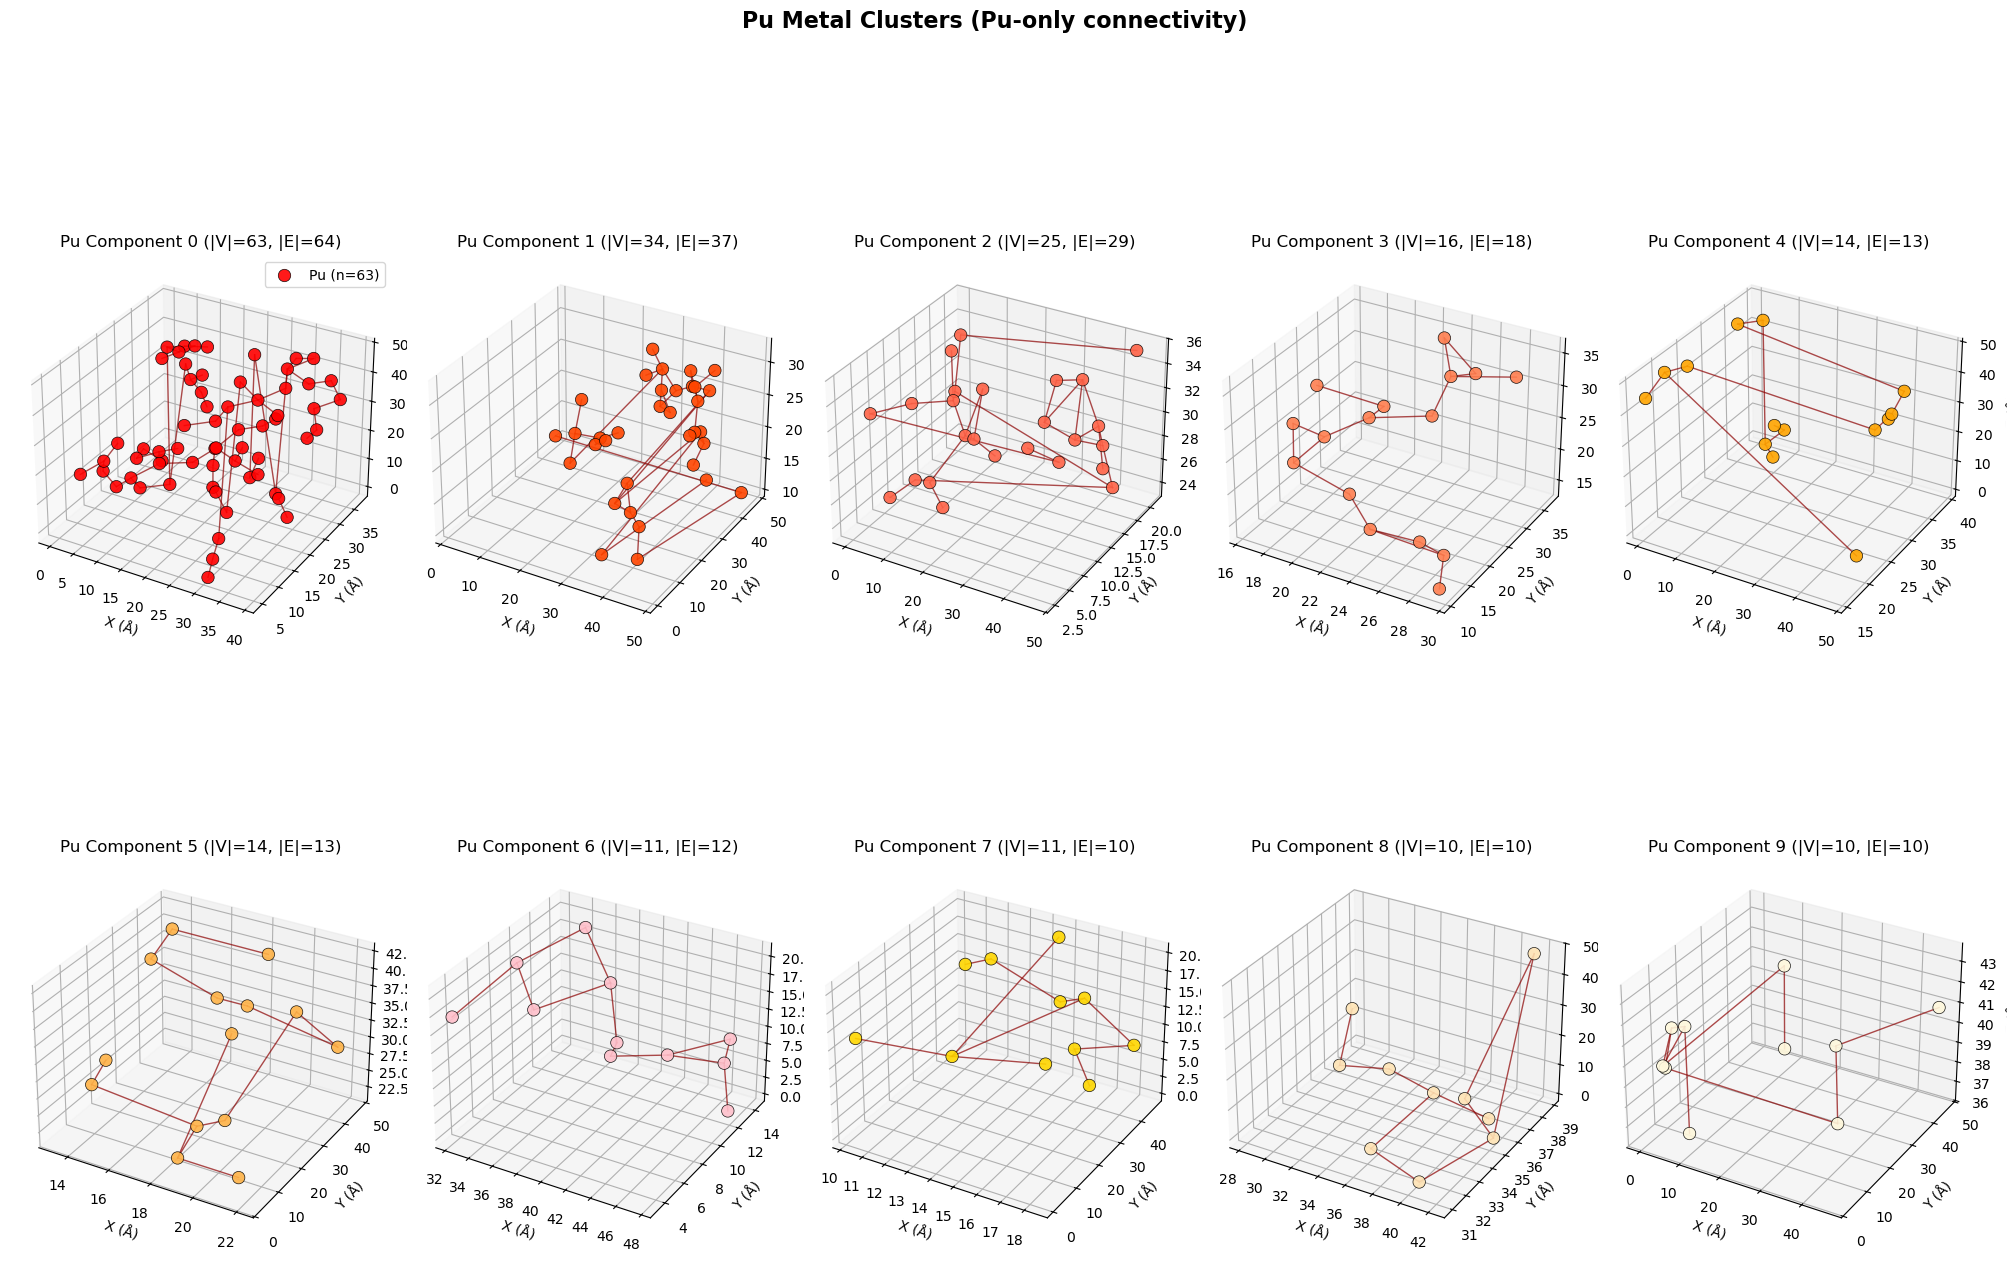

In [16]:
plot_3d_graph_components_pu_only(G,data=data0, names=names, max_components=10)

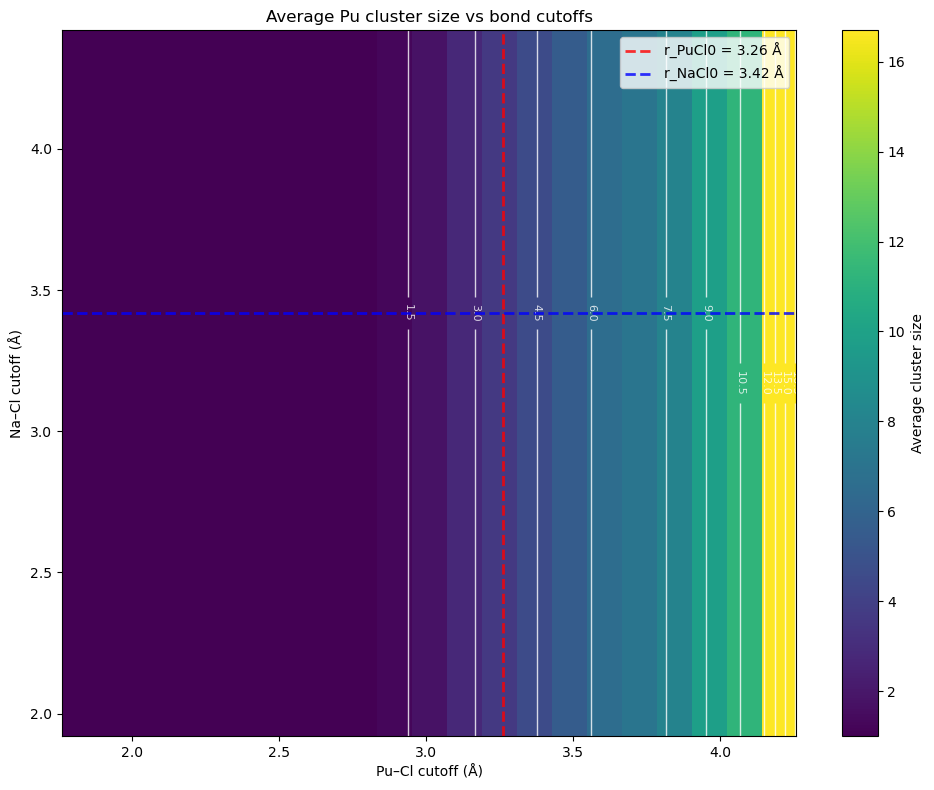

In [17]:
# Average cluster size heatmap vs Na–Cl and Pu–Cl cutoffs
import numpy as np
import matplotlib.pyplot as plt
from bondmodifier_utils import configure_bonds_modifier_from_cutoffs, build_shared_anion_graph

# Reuse existing pipeline and names/data helpers from previous cells
pipe = pipe  # from above

# Get a baseline frame to pull names later
base = pipe.compute(0)
names = result["names"] if "result" in globals() and "names" in result else None
if names is None:
    # Fallback: extract names from OVITO data
    from bondmodifier_utils import extract_names_array
    names = extract_names_array(base.particles)

# Define sweep ranges around the RDF-derived cutoffs
r_PuCl0 = float(cutoffs.get(("Pu","Cl"), cutoffs.get("Pu-Cl", 3.5)))
r_NaCl0 = float(cutoffs.get(("Na","Cl"), cutoffs.get("Na-Cl", 3.8)))

r_PuCl_vals = np.linspace(max(0.5, r_PuCl0 - 1.5), r_PuCl0 + 1.0, 21)  # Increased from 9 to 21 for finer grid
r_NaCl_vals = np.linspace(max(0.5, r_NaCl0 - 1.5), r_NaCl0 + 1.0, 21)  # Increased from 9 to 21 for finer grid

heat = np.zeros((len(r_NaCl_vals), len(r_PuCl_vals)), float)

for i, r_NaCl in enumerate(r_NaCl_vals):
    for j, r_PuCl in enumerate(r_PuCl_vals):
        # Configure bond cutoffs; mirror symmetric pairs
        pair_cutoffs = {
            ("Pu","Cl"): float(r_PuCl), ("Cl","Pu"): float(r_PuCl),
            ("Na","Cl"): float(r_NaCl), ("Cl","Na"): float(r_NaCl),
        }
        configure_bonds_modifier_from_cutoffs(pipe, pair_cutoffs)
        data = pipe.compute(0)
        # Build shared-anion connectivity among Pu atoms only
        sizes, cluster_ids, G = build_shared_anion_graph(data, names, anion="Cl", metals=["Pu"])  # noqa: F841
        heat[i, j] = float(np.mean(sizes)) if sizes.size > 0 else 0.0

plt.figure(figsize=(10, 8))  # Increased figure size
im = plt.imshow(heat, origin='lower', aspect='auto',
                extent=[r_PuCl_vals[0], r_PuCl_vals[-1], r_NaCl_vals[0], r_NaCl_vals[-1]],
                cmap='viridis')
plt.colorbar(im, label='Average cluster size')

# Add contour lines with cluster size labels
X, Y = np.meshgrid(r_PuCl_vals, r_NaCl_vals)
contours = plt.contour(X, Y, heat, levels=10, colors='white', alpha=0.8, linewidths=1)
plt.clabel(contours, fontsize=8, fmt='%.1f')

# Add reference lines for original cutoff values
plt.axvline(r_PuCl0, color='red', linestyle='--', linewidth=2, alpha=0.8, label=f'r_PuCl0 = {r_PuCl0:.2f} Å')
plt.axhline(r_NaCl0, color='blue', linestyle='--', linewidth=2, alpha=0.8, label=f'r_NaCl0 = {r_NaCl0:.2f} Å')
plt.legend()

plt.xlabel('Pu–Cl cutoff (Å)')
plt.ylabel('Na–Cl cutoff (Å)')
plt.title('Average Pu cluster size vs bond cutoffs')
plt.tight_layout()
plt.show()
